## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [20]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [4]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [22]:
#5 Prepare  X (independent variables) and y (dependent variable)
X = df.drop(columns=['price'])
y = df[['price']]
(X.shape,y.shape)

((545, 12), (545, 1))

<Figure size 2500x2500 with 0 Axes>

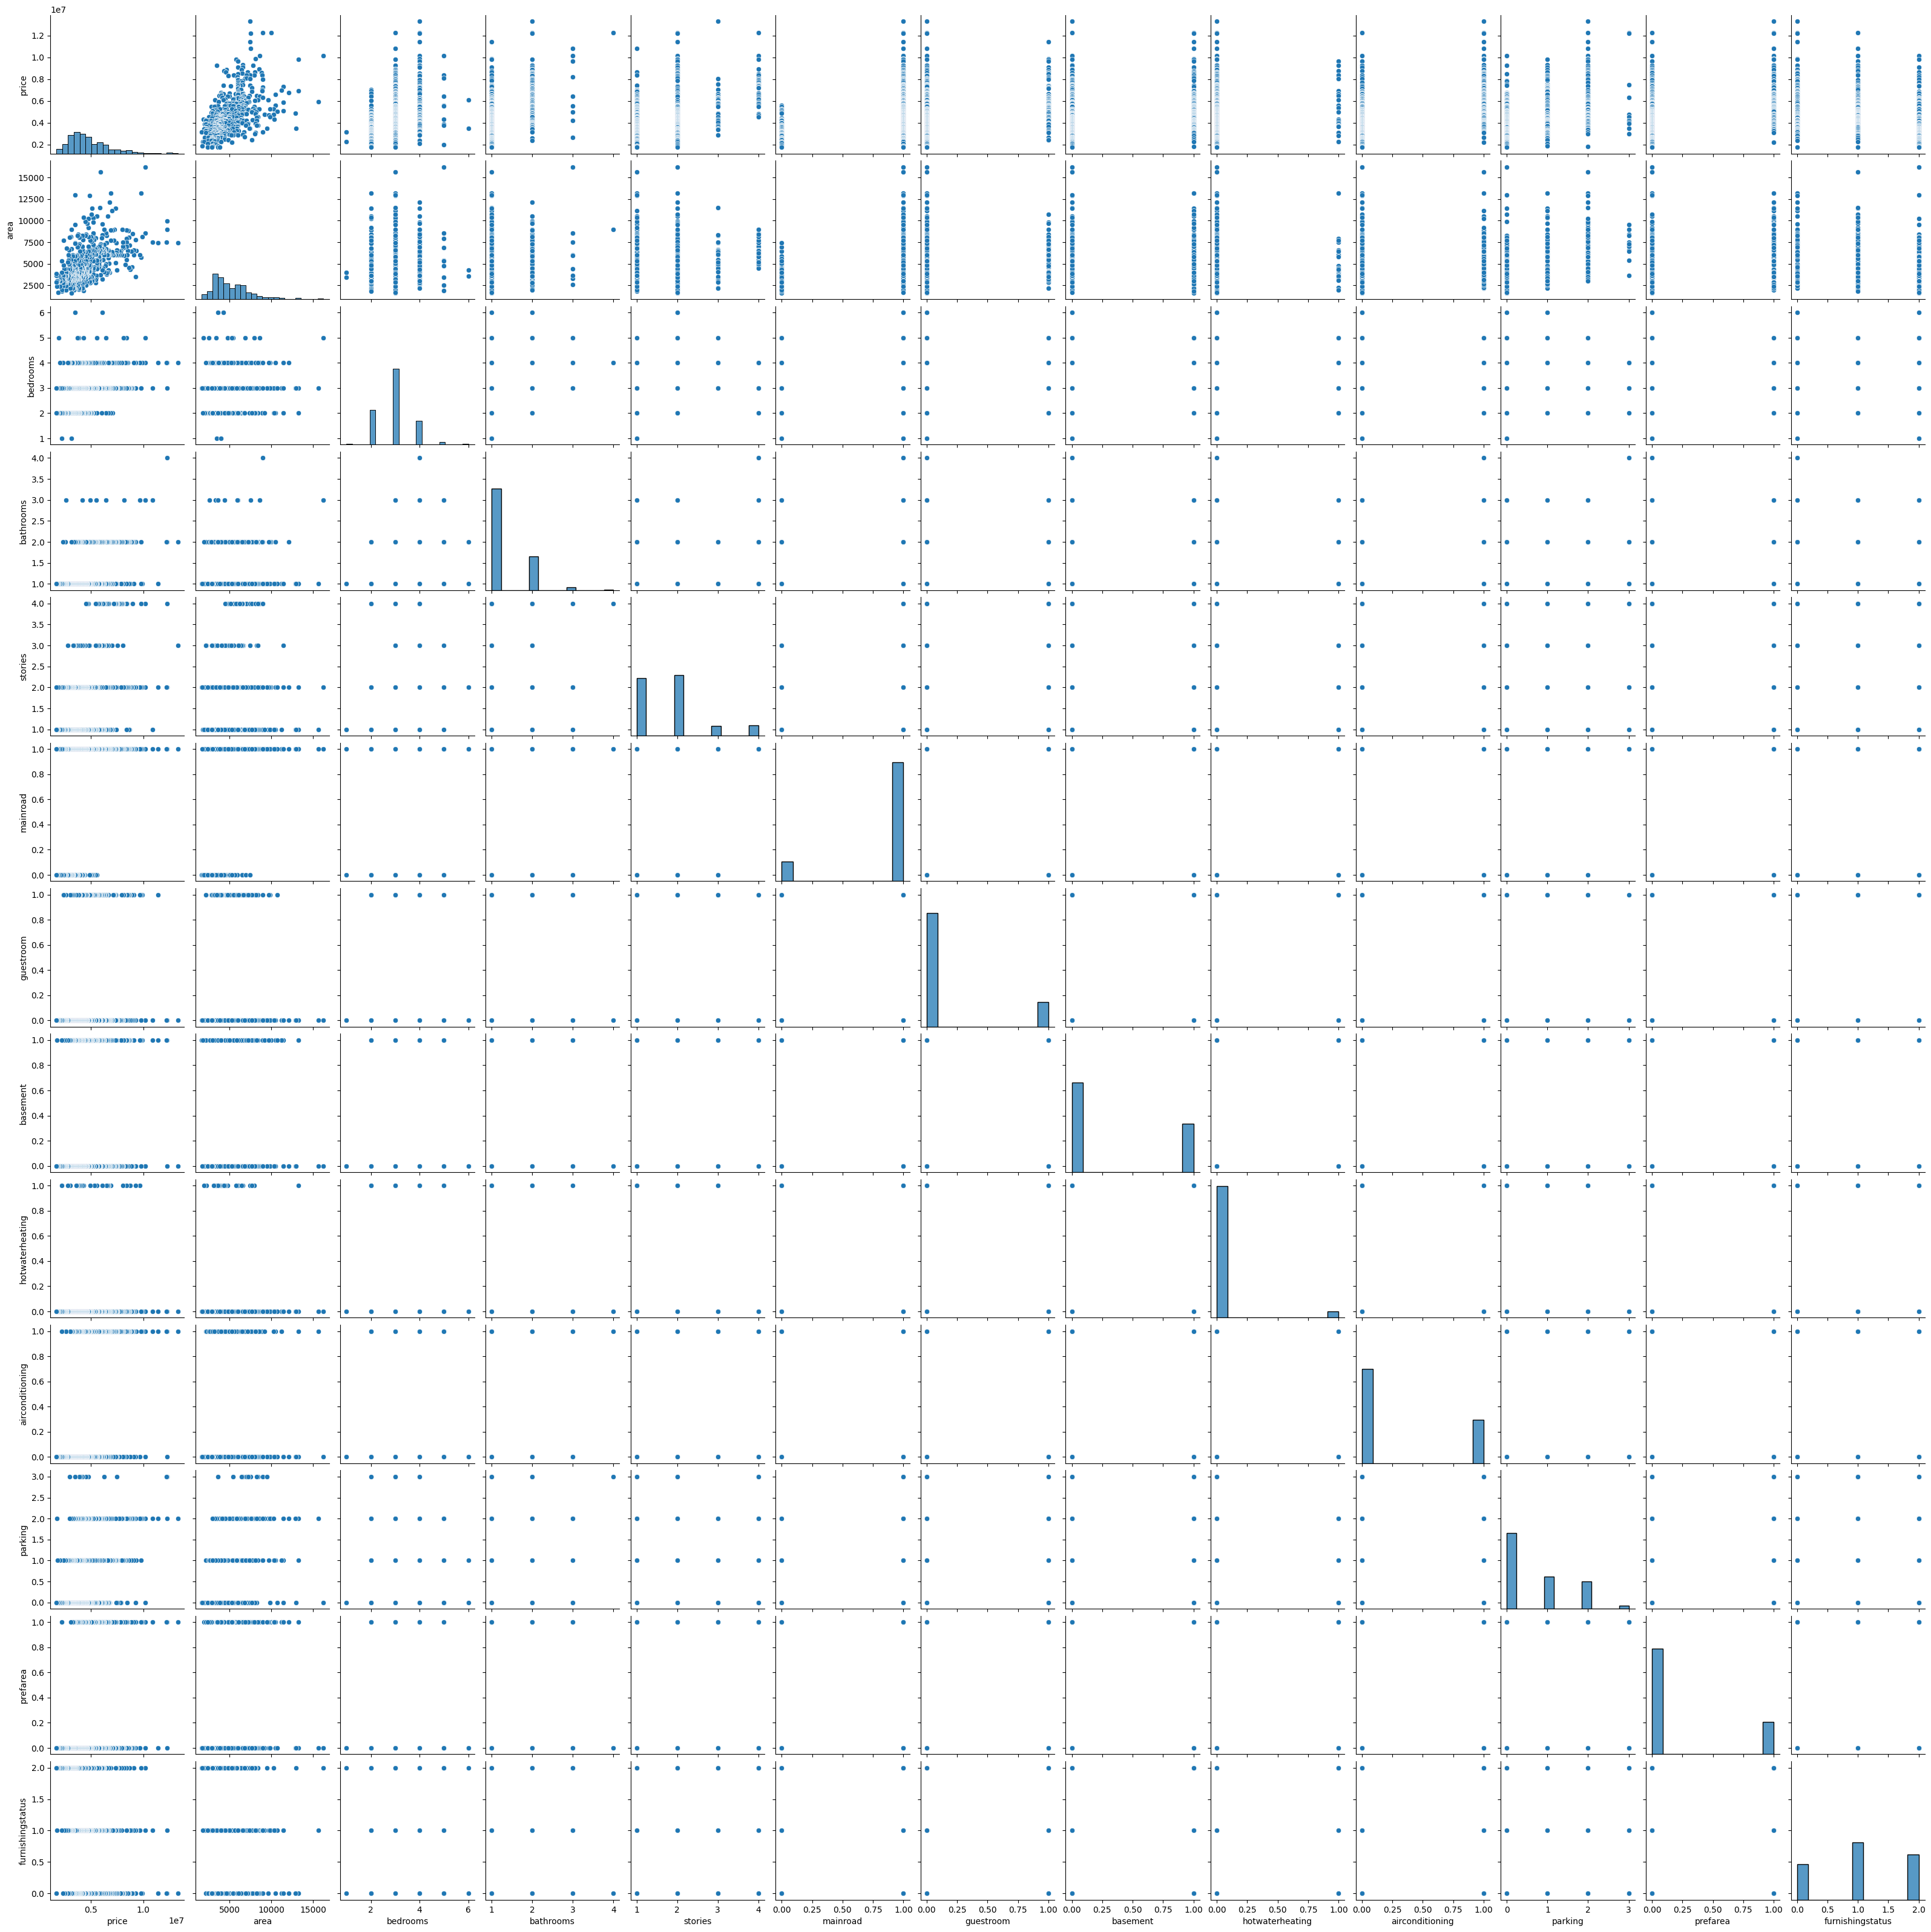

In [18]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

In [23]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])

In [ ]:
#8  Avoiding the Dummy Variable Trap

df = pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [25]:
df['furnishingstatus_semi-furnished'] = le.fit_transform(df['furnishingstatus_semi-furnished'])
df['furnishingstatus_unfurnished'] = le.fit_transform(df['furnishingstatus_unfurnished'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [28]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler

X = df.drop('price',axis = 1)
y = df['price']

features = ['area','bedrooms','bathrooms','stories','parking']
sc = StandardScaler()

df[features] = sc.fit_transform(df[features])

df[features]

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


In [31]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((381, 13), (164, 13), (381,), (164,))

In [32]:
#11 Fitting Multiple Linear Regression to the Training

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [36]:
#12 Predict on the train set and calculate the error = y_pred - y_train

y_train_pred = model.predict(X_train)

error = y_train_pred - y_train

train_results = pd.DataFrame({'Actual': y_train.values, 'y_train_pred': y_train_pred, 'error': error})
train_results.head(10)

,Actual,y_train_pred,error
126,5880000,5.298920e+06,-5.810803e+05
363,3710000,3.600167e+06,-1.098328e+05
370,3640000,4.452142e+06,8.121415e+05
31,8400000,6.473779e+06,-1.926221e+06
113,6083000,6.313198e+06,2.301975e+05
222,4760000,6.172307e+06,1.412307e+06
462,3080000,3.195801e+06,1.158013e+05
177,5243000,4.681087e+06,-5.619131e+05
57,7245000,8.779442e+06,1.534442e+06
244,4550000,5.189165e+06,6.391653e+05


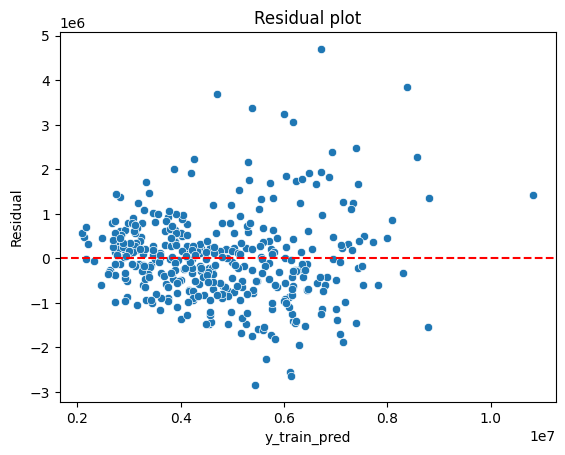

In [ ]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

residual = y_train - y_train_pred

sns.scatterplot(x=y_train_pred,y = residual)
plt.xlabel('y_train_pred')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.axhline(0, color='red', linestyle='--')


In [41]:
#14  Predic on the test set

y_pred = model.predict(X_test)
y_pred

array([5372312.61614641, 7069241.00525806, 3099290.78784024,
       4526446.61703974, 3281573.61192656, 3589455.18752548,
       5728625.30074516, 6422877.52476236, 2797870.49568591,
       2554357.99210551, 9693560.19894657, 2802903.76131031,
       3026465.95300837, 3433891.33202092, 3792786.34565513,
       5321204.36478555, 2999852.37322993, 4813306.52790376,
       4572077.61633939, 3595733.80237382, 5605701.03333098,
       5838934.41614982, 2730716.89440109, 4837741.37096246,
       5638460.49223857, 7809681.30410656, 3347443.37529207,
       5328750.6625753 , 8323072.8323739 , 3374792.28854335,
       6379706.15324898, 3397999.89564252, 6709115.8233402 ,
       4249666.18392567, 3594972.20315591, 5842994.13027721,
       5115480.11172668, 4359421.90319847, 3046570.15372424,
       4597379.56416964, 4784358.1758961 , 3411743.78220679,
       7048978.02507302, 4062741.36892573, 3785699.24160861,
       4286017.77250844, 6729020.20739641, 4133428.23821411,
       3845434.09183084,

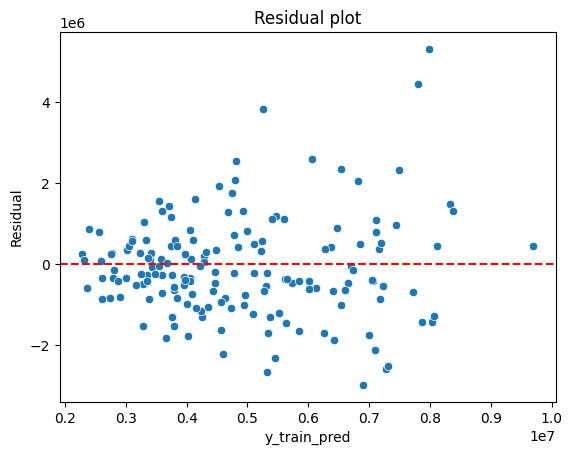

In [47]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

residual = y_test - y_pred

sns.scatterplot(x=y_pred,y = residual)
plt.xlabel('y_train_pred')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.axhline(0, color='red', linestyle='--')

In [49]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score

MSE = ((y_test - y_pred) ** 2).mean()
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean Squared Error: {MSE} - {mse}   - {r2}')

Mean Squared Error: 1523019469501.2915 - 1523019469501.2915   - 0.6463350878895876


In [54]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

dumy = pd.read_csv('Housing.csv')
k = dumy.shape[1]
n = len(y_test)

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

adj_r2

0.6156841288400186